In [ ]:
from io import StringIO
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

If you want to use any of the datasets in the alteryx bucket, please use the following code:

In [ ]:
#This gets the alteryx output dataset:
url = 'https://capstoneprojectycbs299.s3.ca-central-1.amazonaws.com/masterdata.csv'

response = requests.get(url)

data = StringIO(response.text)
fire_data = pd.read_csv(data)

In [ ]:
# Store data locally if needed
fire_data.to_csv('masterdata.csv', sep=',', index=False, encoding='utf-8')

In [ ]:
fire_data.head()

,INCIDENT_YEAR,INCIDENT_MONTH,INCIDENT_NOM_ARROND,NUMBER_OF_INCIDENTS,CASERNE,AVERAGE_DISTANCE,ARROND_POPULATION,ARROND_UNITS,ARROND_DETERIOATION_LOGEMENTS,ARROND_SALUBRITES,...,feu_de_véhicule_tunnel_F7_MOU,Feu_véh__convoi__train_métro_,Fumée___puit_d_accès,Incendie_de_fondoir_à_goudron,Interv__niveau_pistes__P,Métro_bâtiment__10_22_avec_feu,Véhicule_10_07,Nom abrégé,No-arro-élection,Arrondissement
0,2016,12,Ahuntsic-Cartierville,3,43,1.228704,126891,66200,0,5,...,0,0,1,0,0,0,0,AHUNTSIC-CARTIE,1.0,Ahuntsic-Cartierville
1,2016,12,Ahuntsic-Cartierville,9,49,0.932468,126891,66200,0,5,...,0,0,0,0,0,0,0,AHUNTSIC-CARTIE,1.0,Ahuntsic-Cartierville
2,2016,12,Ahuntsic-Cartierville,5,42,0.931455,126891,66200,0,5,...,0,0,0,0,0,0,0,AHUNTSIC-CARTIE,1.0,Ahuntsic-Cartierville
3,2016,12,Ahuntsic-Cartierville,4,35,0.911910,126891,66200,0,5,...,0,0,0,0,0,0,0,AHUNTSIC-CARTIE,1.0,Ahuntsic-Cartierville
4,2016,12,Anjou,2,28,1.225944,41928,20250,0,0,...,0,0,0,0,0,0,0,ANJOU,2.0,Anjou


In [ ]:
print(fire_data.dtypes)

INCIDENT_YEAR                       int64
INCIDENT_MONTH                      int64
INCIDENT_NOM_ARROND                object
NUMBER_OF_INCIDENTS                 int64
CASERNE                             int64
                                   ...   
Métro_bâtiment__10_22_avec_feu      int64
Véhicule_10_07                      int64
Nom abrégé                         object
No-arro-élection                  float64
Arrondissement                     object
Length: 62, dtype: object


In [ ]:
fire_data.describe()

,INCIDENT_YEAR,INCIDENT_MONTH,NUMBER_OF_INCIDENTS,CASERNE,AVERAGE_DISTANCE,ARROND_POPULATION,ARROND_UNITS,ARROND_DETERIOATION_LOGEMENTS,ARROND_SALUBRITES,ARROND_PERMITS,...,Feu_de_véhicule_intérieur,Feu_de_véhicule_sur_pont,feu_de_véhicule_tunnel_F7_MOU,Feu_véh__convoi__train_métro_,Fumée___puit_d_accès,Incendie_de_fondoir_à_goudron,Interv__niveau_pistes__P,Métro_bâtiment__10_22_avec_feu,Véhicule_10_07,No-arro-élection
count,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,...,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,14059.000000,6011.000000
mean,2013.729995,6.466036,6.298883,40.233089,4750.784762,87973.160893,22603.055623,0.893947,34.380681,32.044527,...,0.008749,0.005833,0.001992,0.003414,0.073049,0.007113,0.007042,0.002490,0.000569,11.363999
std,5.427513,3.374991,4.830327,21.192197,4351.269423,44838.336252,29186.848336,6.608317,92.096276,54.458256,...,0.094644,0.077997,0.049138,0.063023,0.312401,0.087361,0.116349,0.049835,0.023848,6.160142
min,2005.000000,1.000000,1.000000,3.000000,0.024683,920.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2009.000000,4.000000,3.000000,22.000000,1.052802,66158.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2014.000000,6.000000,5.000000,40.000000,8729.963983,84013.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
75%,2018.000000,9.000000,9.000000,57.000000,8735.536274,131483.000000,49880.000000,0.000000,10.000000,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
max,2023.000000,12.000000,49.000000,78.000000,8758.390080,165031.000000,78743.000000,105.000000,671.000000,255.000000,...,2.000000,2.000000,2.000000,3.000000,8.000000,2.000000,4.000000,1.000000,1.000000,18.000000


In [ ]:
fire_data.corr()

<ipython-input-8-eefd8b2db1a4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fire_data.corr()


,INCIDENT_YEAR,INCIDENT_MONTH,NUMBER_OF_INCIDENTS,CASERNE,AVERAGE_DISTANCE,ARROND_POPULATION,ARROND_UNITS,ARROND_DETERIOATION_LOGEMENTS,ARROND_SALUBRITES,ARROND_PERMITS,...,Feu_de_véhicule_intérieur,Feu_de_véhicule_sur_pont,feu_de_véhicule_tunnel_F7_MOU,Feu_véh__convoi__train_métro_,Fumée___puit_d_accès,Incendie_de_fondoir_à_goudron,Interv__niveau_pistes__P,Métro_bâtiment__10_22_avec_feu,Véhicule_10_07,No-arro-élection
INCIDENT_YEAR,1.000000,-0.026387,-0.141573,-0.004635,-0.865488,0.012859,0.011854,0.180069,0.134143,0.060812,...,-0.025035,-0.001489,-0.004385,-0.009159,-0.023943,-0.004201,-0.042723,0.025366,-0.032886,-0.005806
INCIDENT_MONTH,-0.026387,1.000000,0.034945,0.005162,0.017547,-0.003699,-0.000759,-0.010972,-0.005042,0.016177,...,-0.008089,-0.004111,0.004697,0.006899,0.005558,0.019638,0.002692,-0.009859,-0.003295,0.003831
NUMBER_OF_INCIDENTS,-0.141573,0.034945,1.000000,-0.132885,0.138183,0.173158,0.126822,-0.021332,0.054628,0.203466,...,0.040182,0.033323,0.031657,0.042213,0.139206,0.049916,0.016380,-0.000432,0.030016,-0.010517
CASERNE,-0.004635,0.005162,-0.132885,1.000000,0.005511,-0.392457,-0.210563,0.008397,0.056504,-0.186168,...,-0.017402,0.025644,-0.017182,0.009311,-0.091892,-0.016802,0.065025,-0.029849,0.007338,-0.285265
AVERAGE_DISTANCE,-0.865488,0.017547,0.138183,0.005511,1.000000,-0.013067,-0.008612,-0.137957,-0.062380,-0.065515,...,0.025811,0.006245,0.002224,0.006562,0.018004,0.022267,0.055528,-0.017293,0.021857,0.007615
ARROND_POPULATION,0.012859,-0.003699,0.173158,-0.392457,-0.013067,1.000000,0.034853,0.097760,0.152519,-0.064695,...,0.003239,-0.025911,0.019687,-0.005776,0.071830,0.005976,-0.094176,0.027653,-0.004039,-0.271106
ARROND_UNITS,0.011854,-0.000759,0.126822,-0.210563,-0.008612,0.034853,1.000000,0.046559,0.192223,0.741863,...,0.031183,0.046944,0.016519,0.012226,0.099109,-0.002881,-0.046874,0.018509,0.008824,0.258808
ARROND_DETERIOATION_LOGEMENTS,0.180069,-0.010972,-0.021332,0.008397,-0.137957,0.097760,0.046559,1.000000,0.066596,-0.044308,...,-0.007046,-0.009013,0.033071,-0.007329,-0.009410,-0.011015,-0.008188,0.006634,-0.003228,-0.189962
ARROND_SALUBRITES,0.134143,-0.005042,0.054628,0.056504,-0.062380,0.152519,0.192223,0.066596,1.000000,0.142989,...,0.011566,-0.007162,-0.010227,0.010622,0.016914,0.003147,-0.022596,0.001250,0.001650,-0.054360
ARROND_PERMITS,0.060812,0.016177,0.203466,-0.186168,-0.065515,-0.064695,0.741863,-0.044308,0.142989,1.000000,...,0.020254,0.048874,0.015517,0.028309,0.127494,0.007245,-0.035616,0.012671,-0.001882,0.592078


In [ ]:
#get one caserne only

In [ ]:
#get the entire dataset groupe

In [ ]:
#remove 2023 and 2005
exclude = fire_data[fire_data['INCIDENT_YEAR'] < 2023]

In [ ]:
exclude.describe()

,INCIDENT_YEAR,INCIDENT_MONTH,NUMBER_OF_INCIDENTS,CASERNE,AVERAGE_DISTANCE,ARROND_POPULATION,ARROND_UNITS,ARROND_DETERIOATION_LOGEMENTS,ARROND_SALUBRITES,ARROND_PERMITS,...,Feu_de_véhicule_intérieur,Feu_de_véhicule_sur_pont,feu_de_véhicule_tunnel_F7_MOU,Feu_véh__convoi__train_métro_,Fumée___puit_d_accès,Incendie_de_fondoir_à_goudron,Interv__niveau_pistes__P,Métro_bâtiment__10_22_avec_feu,Véhicule_10_07,No-arro-élection
count,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,...,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,13519.000000,5776.000000
mean,2013.359716,6.523190,6.335380,40.236852,4940.503113,87945.671647,22593.430505,0.708854,33.566832,32.396405,...,0.008802,0.005918,0.002071,0.003403,0.075671,0.007249,0.007323,0.002071,0.000592,11.366517
std,5.202382,3.392533,4.845653,21.199567,4330.441531,44853.090143,29187.435838,5.417392,92.756442,54.892897,...,0.094982,0.078606,0.050109,0.063112,0.317836,0.088254,0.118641,0.045465,0.024320,6.162491
min,2005.000000,1.000000,1.000000,3.000000,0.024683,920.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2009.000000,4.000000,3.000000,22.000000,1.088784,66158.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,2013.000000,6.000000,5.000000,40.000000,8730.344391,84013.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
75%,2018.000000,9.000000,9.000000,57.000000,8735.715786,131483.000000,49880.000000,0.000000,8.000000,55.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000
max,2022.000000,12.000000,49.000000,78.000000,8758.390080,165031.000000,78743.000000,66.000000,671.000000,255.000000,...,2.000000,2.000000,2.000000,3.000000,8.000000,2.000000,4.000000,1.000000,1.000000,18.000000


In [ ]:
exclude2 = exclude[(exclude['INCIDENT_NOM_ARROND'] == 'Ahuntsic-Cartierville')]
exclude2['date'] = pd.to_datetime(dict(year=exclude2.INCIDENT_YEAR, month=exclude2.INCIDENT_MONTH, day=1))

<ipython-input-13-6738b7705d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exclude2['date'] = pd.to_datetime(dict(year=exclude2.INCIDENT_YEAR, month=exclude2.INCIDENT_MONTH, day=1))


In [ ]:
column = {
    'NUMBER_OF_INCIDENTS':'sum',
    'ARROND_UNITS':'median',
    'ARROND_DETERIOATION_LOGEMENTS':'median',
    'ARROND_SALUBRITES':'median',
    'ARROND_PERMITS':'median',
    'ARROND_VACANCIES':'median',
    'ARROND_TREES':'median',
    'ARROND_RUELLES_VERTES':'median',
    'ARROND_AVG_CONSTRUCTION_YEAR':'median',
    'ARROND_EXTERMINATIONS':'median',
    'AVERAGE_TEMP':'median',
    'ARROND_AIDE_ALIMENTAIRE':'median',
    'ARROND_POPULATION':'median'
}
exclude2 = exclude2.groupby('date', as_index=False).aggregate(column)

In [ ]:
exclude2.head()

,date,NUMBER_OF_INCIDENTS,ARROND_UNITS,ARROND_DETERIOATION_LOGEMENTS,ARROND_SALUBRITES,ARROND_PERMITS,ARROND_VACANCIES,ARROND_TREES,ARROND_RUELLES_VERTES,ARROND_AVG_CONSTRUCTION_YEAR,ARROND_EXTERMINATIONS,AVERAGE_TEMP,ARROND_AIDE_ALIMENTAIRE,ARROND_POPULATION
0,2005-01-01,24,66200.0,0.0,0.0,0.0,37.0,35069.0,16.0,1969.0,0.0,-10.516129,38.5,126891.0
1,2005-02-01,15,66200.0,0.0,0.0,0.0,37.0,35069.0,16.0,1969.0,0.0,-6.214286,18.5,126891.0
2,2005-03-01,20,66200.0,0.0,0.0,0.0,37.0,35069.0,16.0,1969.0,0.0,-3.032258,34.0,126891.0
3,2005-04-01,54,66200.0,0.0,0.0,0.0,37.0,35069.0,16.0,1969.0,0.0,7.233333,37.0,126891.0
4,2005-05-01,33,66200.0,0.0,0.0,0.0,37.0,35069.0,16.0,1969.0,0.0,11.419355,26.5,126891.0


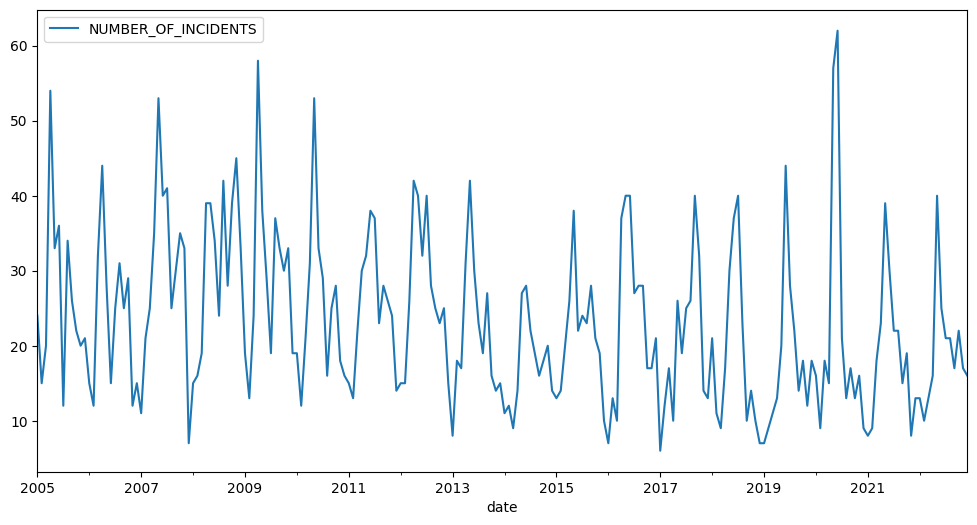

In [ ]:
ax = exclude2.plot(x='date', y='NUMBER_OF_INCIDENTS', figsize=(12,6))

In [ ]:
arima_dataset = exclude2[['date', 'NUMBER_OF_INCIDENTS']].squeeze()

In [ ]:
print(arima_dataset.head())

        date  NUMBER_OF_INCIDENTS
0 2005-01-01                   24
1 2005-02-01                   15
2 2005-03-01                   20
3 2005-04-01                   54
4 2005-05-01                   33


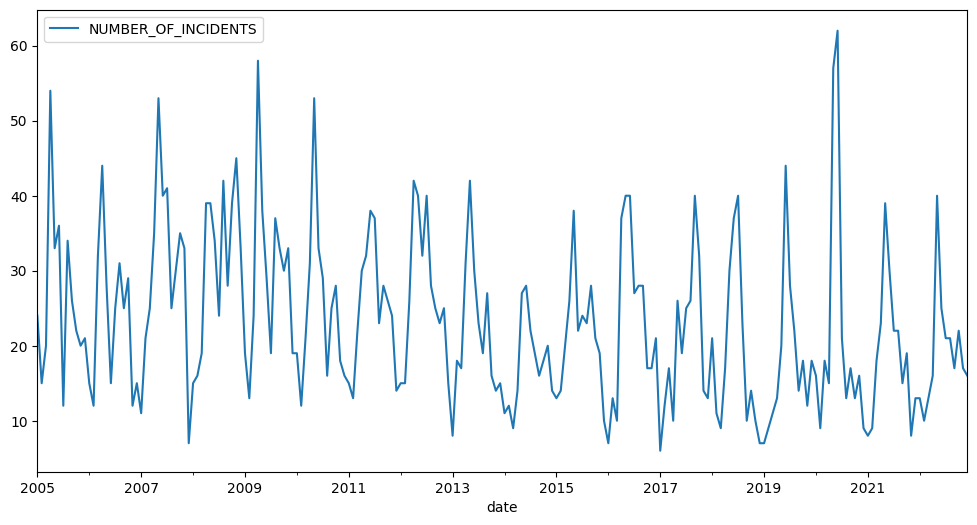

In [ ]:
ax = arima_dataset.plot(x='date', y='NUMBER_OF_INCIDENTS', figsize=(12,6))

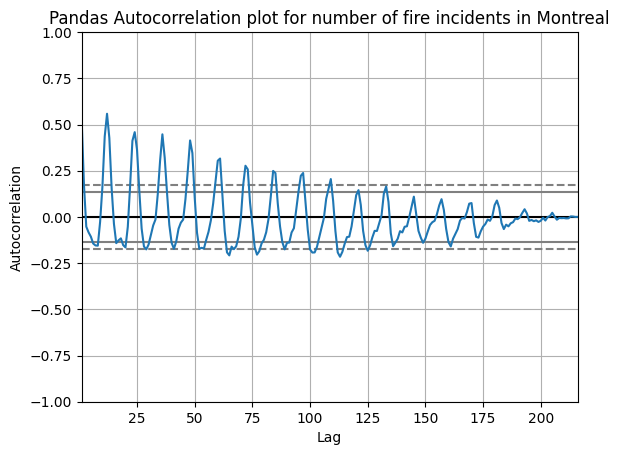

In [ ]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(arima_dataset['NUMBER_OF_INCIDENTS'])
pyplot.title('Pandas Autocorrelation plot for number of fire incidents in Montreal')
pyplot.show()

In [ ]:
#Dicky Fuller Test for p-value?


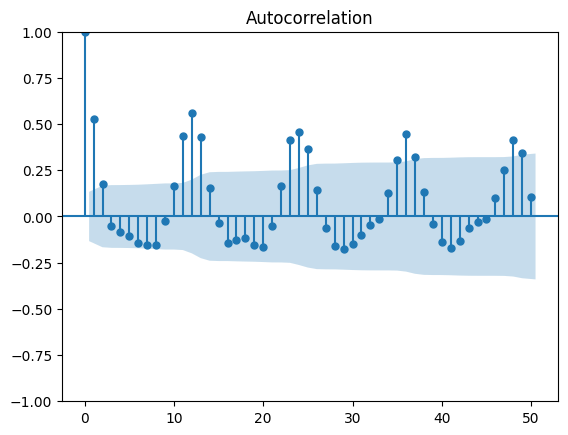

In [41]:
#AutoCorrelation Graph for the q-value.
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(arima_dataset['NUMBER_OF_INCIDENTS'], lags=50)
pyplot.show()

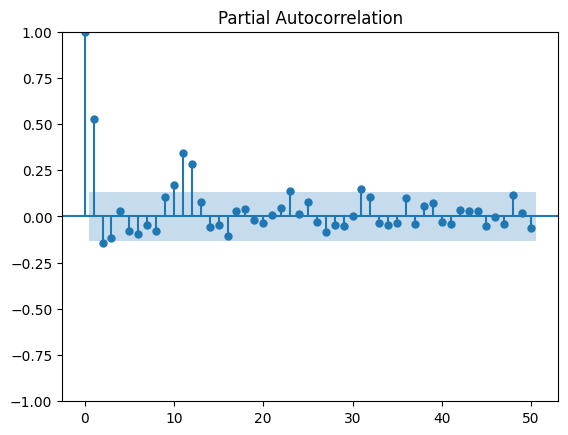

In [ ]:
#Partial AutoCorrelation Graph is for the p-value.
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(arima_dataset['NUMBER_OF_INCIDENTS'], lags=50)
pyplot.show()

# ARIMA

In [ ]:
# fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from matplotlib import pyplot

# fit model
model = ARIMA(arima_dataset['NUMBER_OF_INCIDENTS'], order=(10,1,0))
model_fit = model.fit()
# summary of fit model
model_fit.summary()


<ipython-input-24-b662c08b84a3>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<class 'statsmodels.iolib.summary.Summary'>
"""
                                SARIMAX Results                                
===============================================================================
Dep. Variable:     NUMBER_OF_INCIDENTS   No. Observations:                  216
Model:                 ARIMA(10, 1, 0)   Log Likelihood                -763.708
Date:                 Wed, 01 Nov 2023   AIC                           1549.415
Time:                         18:53:00   BIC                           1586.492
Sample:                              0   HQIC                          1564.396
                                 - 216                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4472      0.055     -8.084      0.000      -0.556      -0.339
ar.L2         -0.4800      0.062     -7.799      0.000      -0.601      -0.359
ar.L3         -0.5467      0.060     -9.154      0.000      -0.664      -0.430
ar.L4         -0.4373      0.079     -5.551      0.000      -0.592      -0.283
ar.L5         -0.4243      0.081     -5.223      0.000      -0.584      -0.265
ar.L6         -0.4516      0.074     -6.132      0.000      -0.596      -0.307
ar.L7         -0.4023      0.075     -5.399      0.000      -0.548      -0.256
ar.L8         -0.4745      0.069     -6.884      0.000      -0.610      -0.339
ar.L9         -0.3908      0.058     -6.777      0.000      -0.504      -0.278
ar.L10        -0.4199      0.062     -6.722      0.000      -0.542      -0.297
sigma2        70.0773      6.089     11.509      0.000      58.143      82.011
===================================================================================
Ljung-Box (L1) (Q):                   3.40   Jarque-Bera (JB):                36.76
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                             0.74
Prob(H) (two-sided):                  0.29   Kurtosis:                         4.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

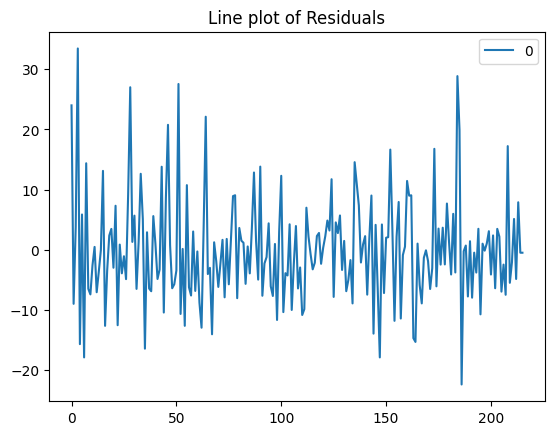

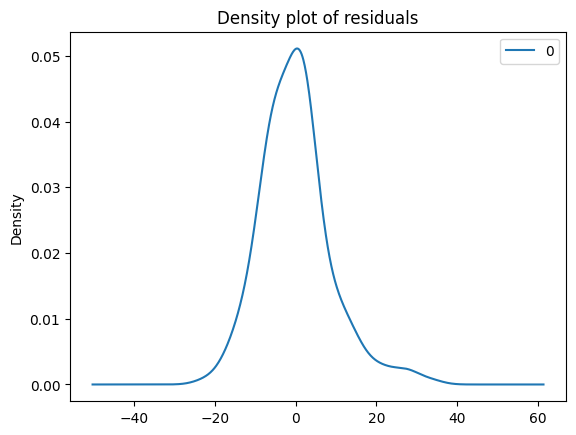

                0
count  216.000000
mean    -0.071222
std      8.720276
min    -22.410053
25%     -6.114808
50%     -0.272290
75%      3.616733
max     33.459114


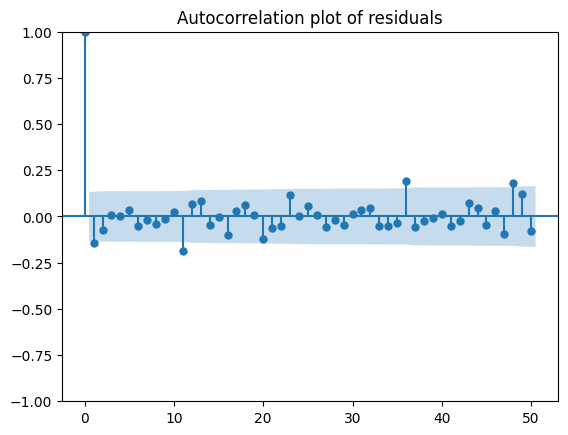

In [ ]:
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot(title="Line plot of Residuals")
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde', title="Density plot of residuals")
pyplot.show()
# summary stats of residuals
print(residuals.describe())
plot_acf(residuals, title="Autocorrelation plot of residuals", lags=50)
pyplot.show()

In [ ]:
from sklearn.model_selection import train_test_split
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(arima_dataset['date'], arima_dataset['NUMBER_OF_INCIDENTS'], test_size=0.33, shuffle=False)

In [ ]:
import datetime
arima_dataset.sort_values(by='date', inplace = True)
validate_dataset = arima_dataset[(arima_dataset['date'] >= '2022-01-01')]
train_dataset = arima_dataset[(arima_dataset['date'] < '2022-01-01')]
X = arima_dataset[['NUMBER_OF_INCIDENTS']].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = [x for x in train]


<ipython-input-27-cac27f592565>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arima_dataset.sort_values(by='date', inplace = True)


In [ ]:
print(len(test))
print(len(train))
print(len(X))

74
142
216


In [ ]:
history = [x for x in train]
predictions = [x for x in train]
for t in range(12):
  model = ARIMA(predictions, order=(10,1,0))
  model_fit = model.fit()
  output = model_fit.forecast()
  #add forecast to predictions
  predictions.append(output)
  #add historical test data to history array
  history.append(test[t])
  print(output)
#plot forecast vs history to compare accuracy of prediction


[15.66754618]
[11.09301327]
[15.49557156]
[12.26882006]
[24.06247716]
[29.19498601]
[33.68219066]
[29.22507331]
[27.36005163]
[27.5958312]
[23.09062179]
[21.17244242]


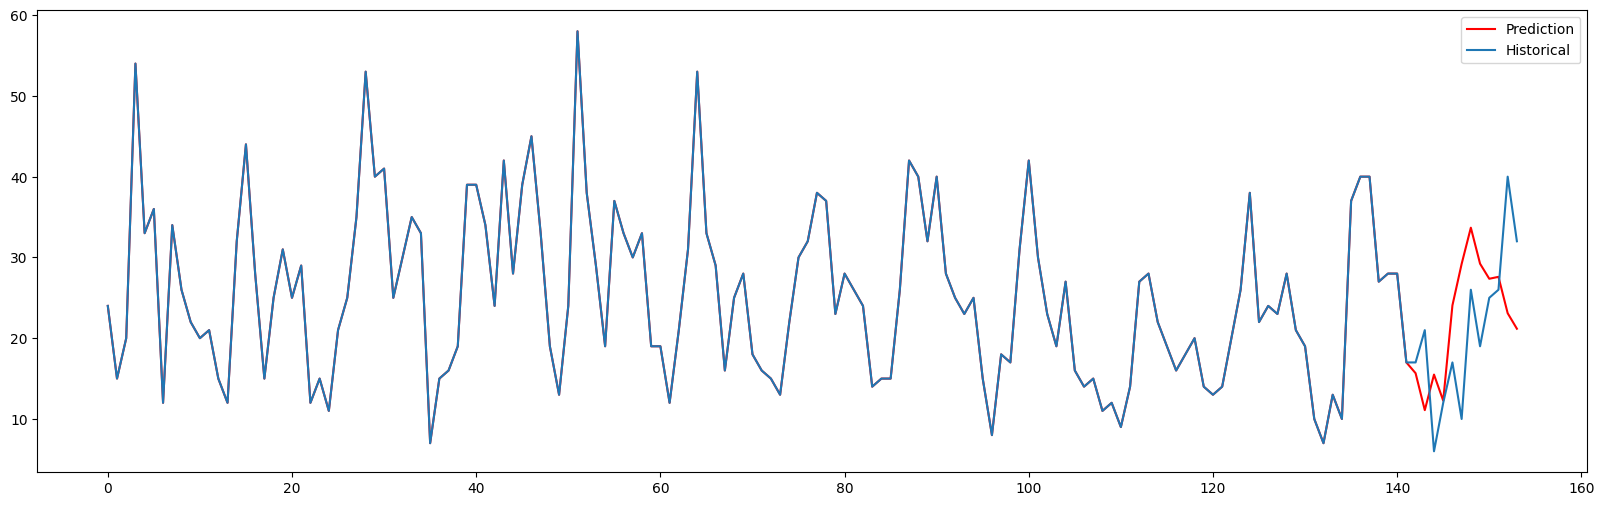

In [ ]:
pyplot.figure(figsize=(20,6))
pyplot.plot(predictions, color='red', label='Prediction')
pyplot.plot(history, label='Historical')
pyplot.legend()
pyplot.show()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate forecasts
rmse = sqrt(mean_squared_error(history, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.772


# SARIMA

In [34]:
history = [x for x in train]
predictions = [x for x in train]
my_order = (1, 1, 1)
my_seasonal_order = (1, 1, 1, 12)
for t in range(12):
  model = sm.tsa.SARIMAX(predictions,order=my_order, seasonal_order=my_seasonal_order)
  model_fit = model.fit()
  output = model_fit.forecast()
  #add forecast to predictions
  predictions.append(output)
  #add historical test data to history array
  history.append(test[t])
  print(output)


[20.71110213]
[13.70450494]
[11.36488341]
[12.40111367]
[17.00617859]
[33.38262842]
[36.49433077]
[29.84055178]
[24.87686853]
[24.47130677]
[24.40864279]
[21.96667019]


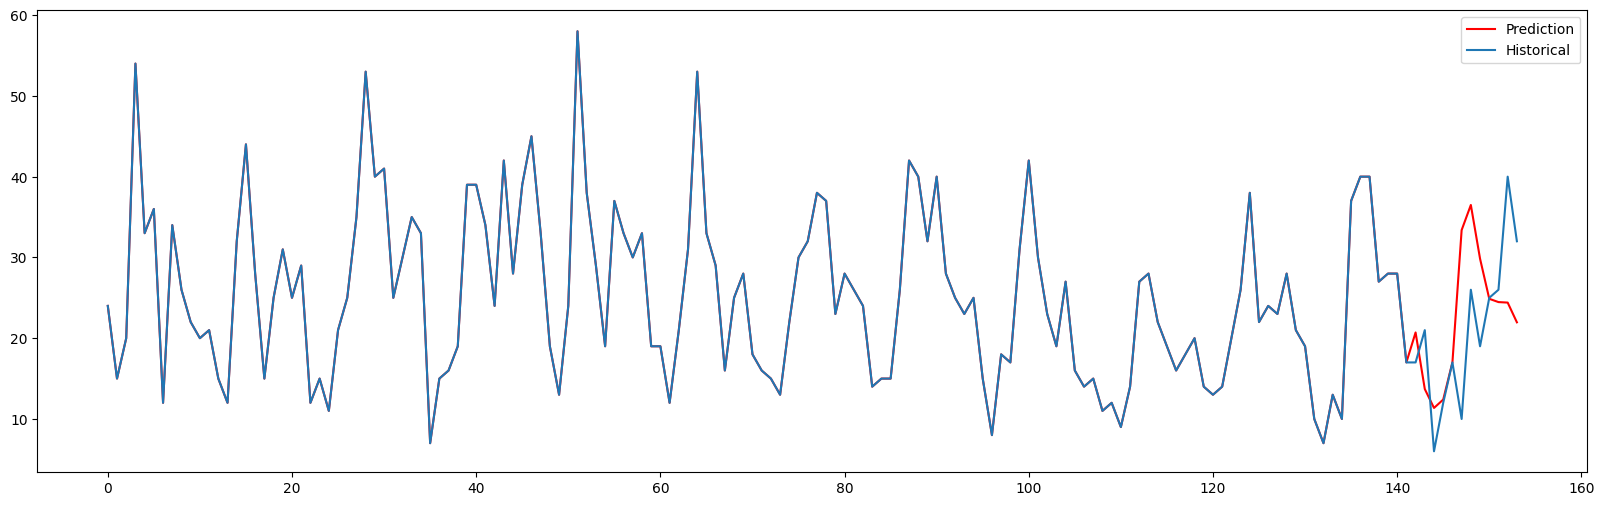

In [35]:
pyplot.figure(figsize=(20,6))
pyplot.plot(predictions, color='red', label='Prediction')
pyplot.plot(history, label='Historical')
pyplot.legend()
pyplot.show()

In [37]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(history, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 2.811


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


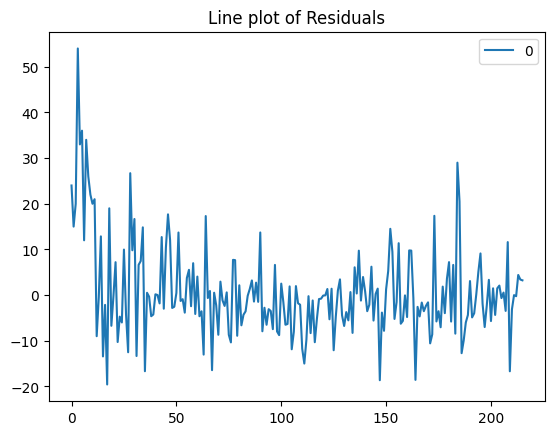

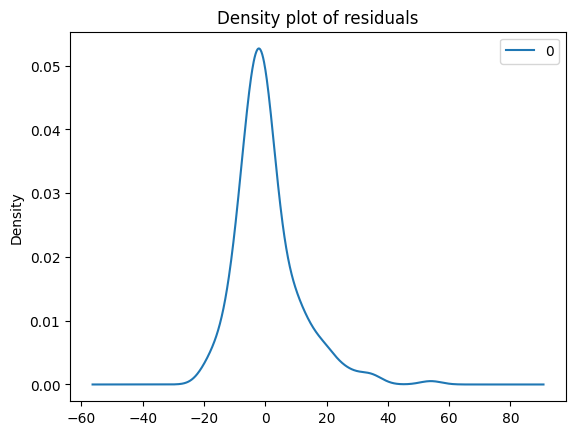

                0
count  216.000000
mean     0.696739
std     10.269049
min    -19.570009
25%     -5.218124
50%     -1.160009
75%      3.806847
max     53.999213


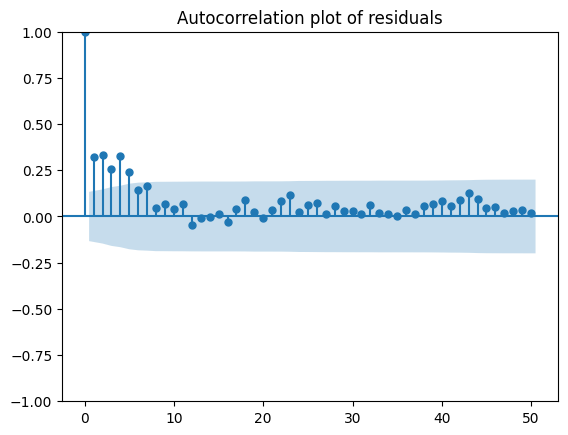

In [38]:
# fit model
my_order = (10, 1, 1)
my_seasonal_order = (10, 1, 1, 12)
model = sm.tsa.SARIMAX(arima_dataset['NUMBER_OF_INCIDENTS'], seasonal_order=my_seasonal_order)
model_fit = model.fit()
# summary of fit model
model_fit.summary()

# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot(title="Line plot of Residuals")
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde', title="Density plot of residuals")
pyplot.show()
# summary stats of residuals
print(residuals.describe())
plot_acf(residuals, title="Autocorrelation plot of residuals", lags = 50)
pyplot.show()

# LSTM

In [ ]:
#Prep data for LSTM
n_features = 11
n_steps = 1
LSTM_Dataset = fire_data
LSTM_Dataset['date'] = pd.to_datetime(dict(year=LSTM_Dataset.INCIDENT_YEAR, month=LSTM_Dataset.INCIDENT_MONTH, day=1))
LSTM_Dataset = LSTM_Dataset.fillna(0)

column = {
    'NUMBER_OF_INCIDENTS':'sum',
    'ARROND_UNITS':'median',
    'ARROND_DETERIOATION_LOGEMENTS':'median',
    'ARROND_SALUBRITES':'median',
    'ARROND_PERMITS':'median',
    'ARROND_VACANCIES':'median',
    'ARROND_TREES':'median',
    'ARROND_RUELLES_VERTES':'median',
    'ARROND_AVG_CONSTRUCTION_YEAR':'median',
    'ARROND_EXTERMINATIONS':'median',
    'AVERAGE_TEMP':'median',
    'ARROND_AIDE_ALIMENTAIRE':'median',
    'ARROND_POPULATION':'median'
}
LSTM_Dataset = LSTM_Dataset.groupby('date', as_index=False).aggregate(column)
LSTM_Dataset.sort_values(by='date', inplace = True)
LSTM_Dataset.head()

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
#x and y
X_LSTM_Dataset = LSTM_Dataset.drop(["NUMBER_OF_INCIDENTS", "date"], axis=1)
#X_LSTM_Dataset = LSTM_Dataset[['ARROND_UNITS', 'ARROND_DETERIOATION_LOGEMENTS']]
X_LSTM_Dataset = np.expand_dims(X_LSTM_Dataset.values[:,:-1],axis = 2)
y_LSTM_Dataset = LSTM_Dataset[["NUMBER_OF_INCIDENTS"]]
tscv = TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=None)
for train_index, test_index in tscv.split(X):
    X_train, X_test = X_LSTM_Dataset.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y_LSTM_Dataset.iloc[train_index], y.iloc[test_index]
print(y_LSTM_Dataset.shape)
print(X_LSTM_Dataset.shape)
#Split train/test

#Shape

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout
tf.random.set_seed(7)

# model = keras.Sequential()
# model.add(layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
# model.add(layers.Dense(1))
# model.compile(optimizer='adam', loss='mse')


# model.summary()
my_model = Sequential()
my_model.add(LSTM(units = 64,input_shape = (n_features, n_steps)))
my_model.add(Dropout(0.4))
my_model.add(Dense(1))

my_model.compile(loss = 'mse',optimizer = 'adam', metrics = ['mean_squared_error'])
my_model.summary()

In [ ]:
EPOCH = 10
BATCH_SIZE = 1024
NUM_FOLDS = 10

my_model.fit(X_LSTM_Dataset,y_LSTM_Dataset,epochs = EPOCH, batch_size = BATCH_SIZE)

In [ ]:
# creating submission file
submission_pfs = my_model.predict(X_test)
# we will keep every value between 0 and 20
submission_pfs = submission_pfs.clip(0,20)
# creating dataframe with required columns
submission = pd.DataFrame({'ID':test_data['ID'],'item_cnt_month':submission_pfs.ravel()})
# creating csv file from dataframe
submission.to_csv('sub_pfs.csv',index = False)

In [ ]:
import numpy as np, os
import pandas as pd


# https://www.kaggle.com/c/ventilator-pressure-prediction/discussion/274717
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.optimizers.schedules import ExponentialDecay

from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import RobustScaler, normalize
from sklearn.model_selection import train_test_split, GroupKFold, KFold

from IPython.display import display